In [1]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import napari

In [2]:
img = imread("example.tif")
scales = np.array([5, 0.73125, 0.73125])*np.array([4, 8, 8])
unit = ["um","um","um"]
axes = "ZYX"

In [3]:
print(scales)
print(img.shape)

[20.    5.85  5.85]
(224, 2368, 1056)


In [4]:
napari_viewer = napari.Viewer()
napari_viewer.add_image(img, scale=scales)

<Image layer 'img' at 0x2e4d4544f40>

In [5]:
img_mip = np.max(img,axis=0)

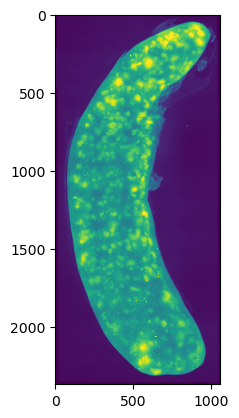

C:\Users\nicol\miniconda3\envs\skimage-napari-tutorial\lib\site-packages\napari\_vispy\layers\image.py:259: UserWarning: data shape (224, 2368, 1056) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(
C:\Users\nicol\miniconda3\envs\skimage-napari-tutorial\lib\site-packages\napari\_vispy\layers\image.py:259: UserWarning: data shape (224, 2368, 1056) exceeds GL_MAX_TEXTURE_SIZE 2048 in at least one axis and will be downsampled. Rendering is currently in 3D mode.
  warnings.warn(


In [6]:
lims = np.percentile(img_mip,(3,99.7))

plt.imshow(img_mip, clim=(lims[0], lims[1]))

In [10]:
from skimage.filters import threshold_otsu

In [20]:
# Volume
thr_vol = threshold_otsu(img)
img_mask = img>thr
vol_pxl = np.sum(img_mask)
vol_um3 = vol_pxl * np.product(scales)
print("Volume (mm^3):",vol_um3/1000**3)

Volume (mm^3): 55.53841738184999


In [11]:
thr = threshold_otsu(img_mip)
img_mask = img_mip>thr

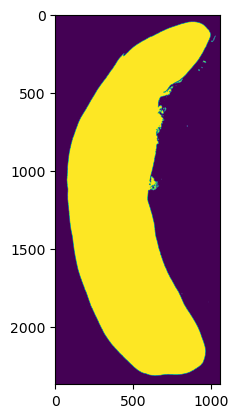

In [12]:
plt.imshow(img_mask)

In [13]:
from skimage.morphology import skeletonize

In [15]:
skeleton = skeletonize(img_mask)

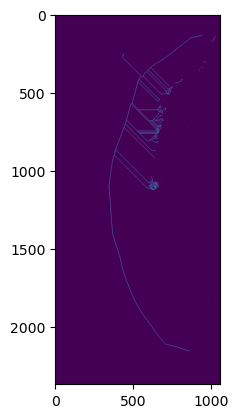

In [16]:
plt.imshow(skeleton)